In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib widget
%matplotlib inline



import glob
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai

from jedi import settings
import jedi



# set sensible default parameters for matplotlib
plt.rcParams['figure.figsize'] = [9, 5]

plt.style.use('dark_background')

plt.rcParams['figure.dpi'] = 120

plt.style.use('dark_background')

In [2]:
path = Path('../../data/train_images_sorted_extra')
cat_names = ['CBB', 'CBSD', 'CGM', 'CMD', 'HEALTHY']

In [3]:
df = pd.DataFrame(columns=['image_id', 'label'])

In [4]:
files=get_image_files(path)

In [5]:
for f in files:
        
    if f.parts[-1].startswith('train-cbb'):
        df = df.append({'image_id': f.parts[-1], 'label': 0}, ignore_index=True)

    if f.parts[-1].startswith('train-cbsd'):
        df = df.append({'image_id': f.parts[-1], 'label': 1}, ignore_index=True)
        
    if f.parts[-1].startswith('train-cgm'):
        df = df.append({'image_id': f.parts[-1], 'label': 2}, ignore_index=True)
        
    if f.parts[-1].startswith('train-cmd'):
        df = df.append({'image_id': f.parts[-1], 'label': 3}, ignore_index=True)
        
    if f.parts[-1].startswith('train-healthy'):
        df = df.append({'image_id': f.parts[-1], 'label': 4}, ignore_index=True)
        
df

,image_id,label
0,train-cbsd-1203.jpg,1
1,train-cbsd-1133.jpg,1
2,train-cbsd-801.jpg,1
3,train-cbsd-880.jpg,1
4,train-cbsd-575.jpg,1
...,...,...
5651,train-cbb-420.jpg,0
5652,train-cbb-347.jpg,0
5653,train-cbb-196.jpg,0
5654,train-cbb-24.jpg,0


In [6]:
df.to_csv('../../data/extra_files.csv', index=False)

In [7]:
old_df = pd.read_csv('../../data/train.csv')

In [9]:
old_df.sort_values('label', inplace=True)
# old_df.value_counts('label', sort=False)
df.sort_values('label', inplace=True)
# df.value_counts('label', sort=False)

label
0     1087
1     2189
2     2386
3    13158
4     2577
dtype: int64

### Combine the old and new data

In [11]:
df_extra = df.append(old_df, ignore_index=True, sort=True)

In [12]:
df_extra.loc[:,'label'] = df_extra['label'].astype(int)

<BarContainer object of 5 artists>

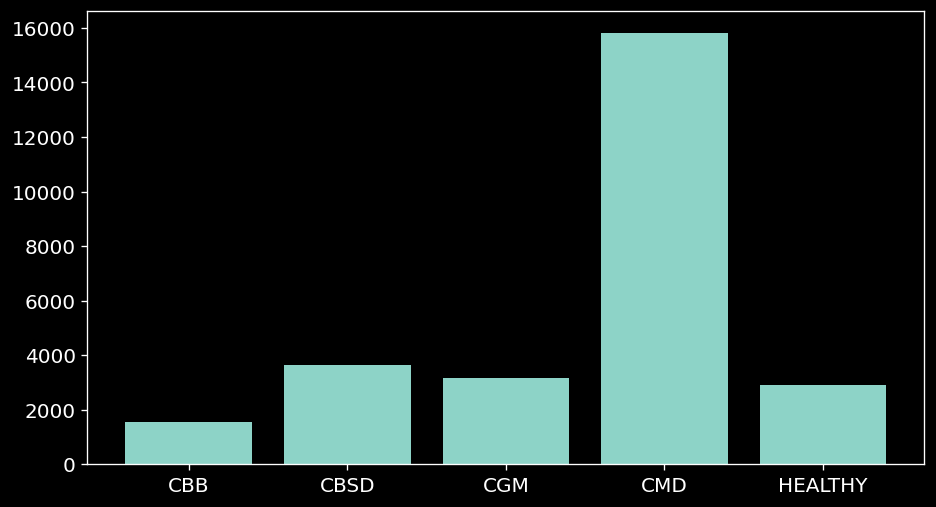

In [13]:
plt.bar(cat_names, df_extra.loc[:,'label'].value_counts(sort=False))

In [15]:
from sklearn.utils.class_weight import compute_class_weight
# some = mms.fit_transform(df_extra['label'].value_counts(sort=False).values.reshape(-1,1))
compute_class_weight('balanced', classes=df_extra.label.unique(), y=df_extra.label)

array([3.48396652, 1.48970264, 1.7127572 , 0.34209661, 1.87023851])

### Stratified split for the test set

In [16]:
df_test = df_extra.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.1))

### remove the test sample from the original df

In [17]:
df_extra = df_extra.drop(index=df_test.index)

In [18]:
df_extra

,image_id,label
0,train-cbb-188.jpg,0
1,train-cbb-255.jpg,0
2,train-cbb-273.jpg,0
3,train-cbb-13.jpg,0
4,train-cbb-76.jpg,0
...,...,...
27048,1983411262.jpg,4
27049,1982908964.jpg,4
27050,4020138210.jpg,4
27051,1991094852.jpg,4


In [19]:
df_test

,image_id,label
6712,1071960213.jpg,0
270,train-cbb-29.jpg,0
353,train-cbb-284.jpg,0
354,train-cbb-151.jpg,0
6240,249609077.jpg,0
...,...,...
25154,2609756462.jpg,4
25867,2654037367.jpg,4
25387,3757297104.jpg,4
5532,train-healthy-69.jpg,4


In [20]:
df_extra.to_csv('../../data/all_train_files.csv', index=False)
df_test.to_csv('../../data/all_test_files.csv', index=False)